<a href="https://colab.research.google.com/github/wanichayaporn/Multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ข้อสอบกลางภาค


##1.Pizza

In [140]:
import pandas as pd

In [141]:
data = pd.read_csv( 'Pizza.csv' ) ##อัปโหลดข้อมูลและปริ้นข้อมูลออกมา
data.head(6) ##แสดง 6 ตัวอย่าง

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67


##ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว เเละมีกี่ dimensions

In [142]:
data.shape #มี data 300 ตัว และ มี dimensions 9ตัว

(300, 9)

##Plot scatter matrix ดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb80ab0110>,
      dtype=object)

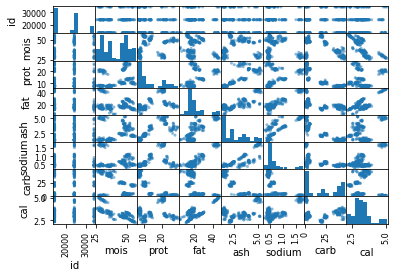

In [143]:
pd.plotting.scatter_matrix(data)

##เนื่องจาก data มี dimension มากเกินไป เราจะทดสอบดูว่าใน column ใดให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [144]:
newdata = data.iloc[:,1:]
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


##ตรวจสอบว่า ระหว่าง column มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [145]:
import numpy as np ##ดึงฟังก์ชั่น numpy ที่เกี่ยวกับตัวเลข

In [146]:
corr = np.corrcoef(newdata.to_numpy().T)

In [147]:
corr.shape #ดูขนาดของ correlation

(8, 8)

In [148]:
corr

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

In [149]:
for i in range(corr.shape[0]):
      for j in range(corr.shape[1]):
          if (i !=j) and (corr[i,j] == 1.):
             print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 
             ##ไม่มี colum ซ้ำ

In [150]:
data_dropped = data.drop(['id'] , axis=1)
data_dropped

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [151]:
data_dropped2 = data.drop(['brand','id'] , axis=1)
data_dropped2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


## Plot graph parallel

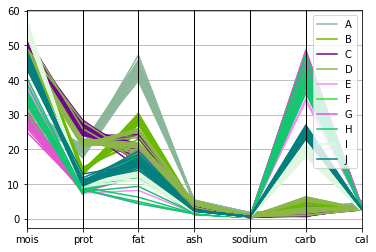

In [152]:
pd.plotting.parallel_coordinates(data_dropped,'brand',cols=['mois','prot','fat','ash',	'sodium','carb','cal'])

##ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [153]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(n_components=2)

In [155]:
new_pca = pca.fit_transform(data_dropped2.to_numpy())

In [156]:
new_pca.shape # data 300 ตัวกลับ เหลือแค่ 2 dimension

(300, 2)

In [157]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

##ดูว่ามีแบรนด์อะไรบ้าง

In [158]:
FG = set(data['brand'])
FG

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

##สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

In [159]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [160]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

##แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [161]:
data_dropped = data_dropped.replace(color_list2)

In [162]:
data_dropped

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


## Plot graph Scatter

In [163]:
from matplotlib import pyplot as plt

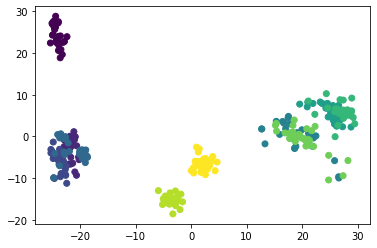

In [164]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand']) ##ข้อมูลทับกัน ทำให้ดูข้อมูลยาก

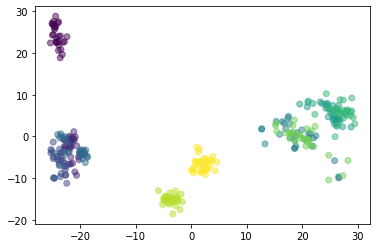

In [165]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5) ##alpha จะทำให้ข้อมูลโปร่งใสดูง่าย

##ทดลอง เปรียบเทียบค่าสารอาหาร fat และ protein




In [166]:
bb = data_dropped[(data_dropped['brand']==1) | (data_dropped['brand']==6)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,brand,mois,prot,fat,ash,sodium,carb,cal
29,1,49.57,13.70,29.07,3.62,1.10,4.04,3.33
30,1,52.68,14.38,25.72,3.26,0.93,3.96,3.05
31,1,48.53,13.14,30.38,3.55,0.99,4.40,3.44
32,1,50.19,13.78,28.39,3.56,1.00,4.08,3.27
33,1,50.67,13.21,27.66,3.64,1.00,4.82,3.21
34,1,49.99,13.35,29.20,3.52,1.05,3.94,3.32
35,1,50.72,12.93,29.88,3.60,1.03,2.87,3.32
36,1,50.81,12.56,29.95,2.99,0.81,3.69,3.35
37,1,54.08,13.28,25.25,3.10,0.80,4.29,2.98
38,1,51.90,14.27,24.92,3.85,1.06,5.06,3.02


In [167]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

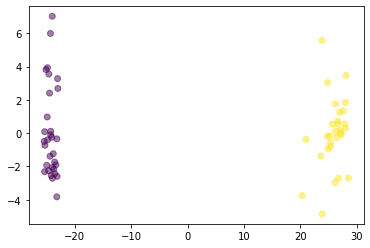

In [168]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['brand'],alpha=0.5) #การกระจายของ fat and sodium

In [169]:
fat_pca = pca.transform(bb[bb['brand']==1].iloc[:,1:].to_numpy())
sodium_pca = pca.transform(bb[bb['brand']==6].iloc[:,1:].to_numpy())

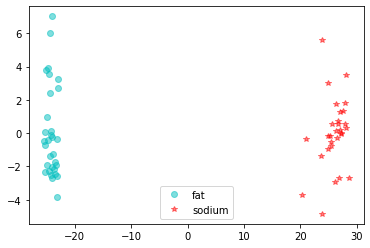

In [170]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'oc',alpha=0.5,label='fat')
plt.plot(sodium_pca[:,0],sodium_pca[:,1],'*r',alpha=0.5,label='sodium')
plt.legend() ##ใส่ชื่อเพื่อให้ง่ายต่อการอ่าน

##2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [171]:
pca.explained_variance_ratio_

array([0.99022555, 0.00935402])

##การใส่ชื่อกราฟ และ แกน

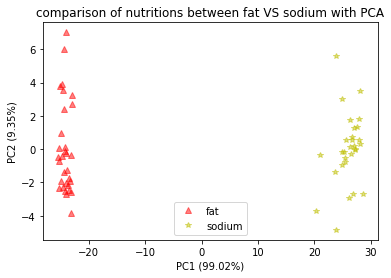

In [172]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'^r',alpha=0.5,label='fat')
plt.plot(sodium_pca[:,0],sodium_pca[:,1],'*y',alpha=0.5,label='sodium')
plt.legend()
plt.title('comparison of nutritions between fat VS sodium with PCA') #ชื่อกราฟ
plt.xlabel('PC1 (99.02%)') #แกน X
plt.ylabel('PC2 (9.35%)');  #แกน Y

##2. nndb_flat

In [173]:
import pandas as pd

In [174]:
data = pd.read_csv( 'nndb_flat.csv' ) ##อัปโหลดข้อมูลและทำการปริ้นข้อมูลออกมา
data.head(6) ##แสดง 6 ตัวอย่าง

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364


##ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว เเละมีกี่ dimensions

In [175]:
data.shape #dataทั้งหมด 8618 ตัว และมีdimensions 45 ตัว

(8618, 45)

##เนื่องจาก data มี dimension มากเกินไป เราจะทดสอบดูว่าใน column ใดให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [176]:
newdata = data.iloc[:,7:] ##ตัดคอลัมป์ออกให้เหลือคอลัมป์ที่เป็นตัวเลขจะตัดตั้งแต่หลัก 1 ถึง หลัก 7
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


##ตรวจสอบว่า ระหว่าง column มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [177]:
import numpy as np ##ดึงฟังก์ชั่น numpy ที่เกี่ยวกับตัวเลข

In [178]:
corr = np.corrcoef(newdata.to_numpy().T)

In [179]:
corr.shape # หาค่าcorrelation ที่ condideta

(38, 38)

In [180]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [181]:
for i in range(corr.shape[0]):
      for j in range(corr.shape[1]):
          if (i !=j) and (corr[i,j] == 1.):
             print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 
             ##คำสั่งนี้เพื่อหาค่า correlationที่เป็น 1 ที่ไม่ใช่เส้นแทยงมุม มีทั้งหมด 12 แถว

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


In [182]:
newdata.iloc[:5,10:29] ##ดูว่าชื่อ colums มีความสัมพันธ์กัน

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500


In [183]:
from matplotlib import pyplot as plt

##data ที่มี correlation เป็น 1

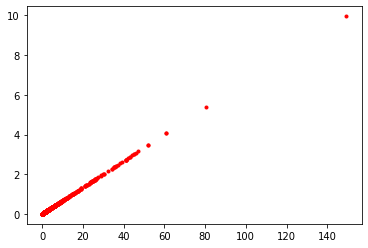

In [184]:
plt.plot(newdata.iloc[:,10] , newdata.iloc[:,27],'r.') ##ค่า correlation เท่ากับ 1 เเต่คนละค่าเวลา plot กราฟจะเป็นเส้นตรง

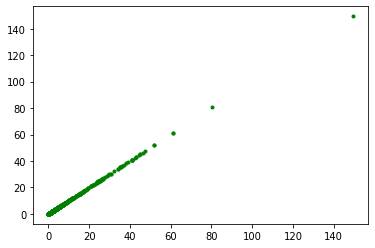

In [185]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'g.')

##data ที่มี correlation เป็นค่าอื่นๆ

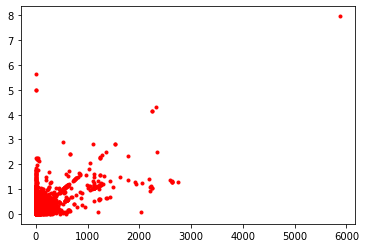

In [186]:
plt.plot(newdata.iloc[:,11] , newdata.iloc[:,29],'r.')

##ลบ column ซ้ำ

In [187]:
newdata.columns.str.contains('_USRDA') ##หา columns ที่มี _USRDA ถ้ามีจะเป็น ture ไม่มีจะเป็น false

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [188]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values ## ลบ columns ต้องใส่ asix = 1 ถ้าลบ row asix = 0 เป็นการลบ columns ที่มีชื่อข้างหลัง( _USRDA)

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [189]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


##ลบ column ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น

In [190]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'] , axis=1)
newdata_dropped ##ลบ column ที่ซ้ำกัน

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [191]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'] , axis=1)
data_dropped ##ลบ column ที่ไม่ใช่ตัวเลขออก

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


##plot กราฟ parallel coordinate

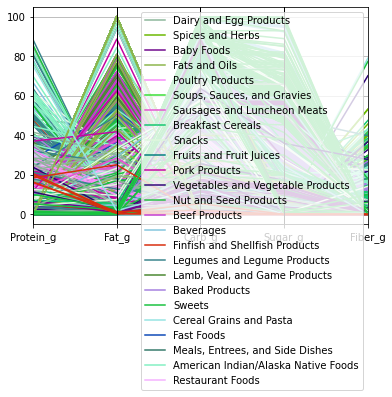

In [192]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])
##data มี dimension มากเกินไป จึงต้องทำ PCA เพื่อลดจำนวนของข้อมูล

##ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [193]:
from sklearn.decomposition import PCA

In [194]:
pca = PCA(n_components=2) ##2 dimensions

In [195]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy()) 

In [196]:
new_pca.shape # dataมี8618 ตัว และ มี 2 dimensions

(8618, 2)

In [197]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

หาค่าที่เป็นไปได้ทั้งหมด

In [198]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

##สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

In [199]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่า สมาชิกจากน้อยไปมาก
color_list = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [200]:
color_list

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

##แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [201]:
data_dropped2 = data_dropped.replace(color_list)

In [202]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Plot กราฟ Scatter

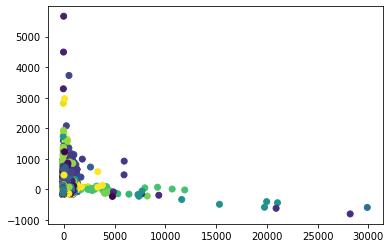

In [203]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup']) ##การกระจายของข้อมูล ทับกันมากทำให้ดูข้อมูลยาก

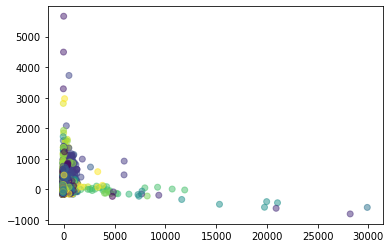

In [204]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5) ##alpha ทำให้ข้อมูลโปร่งใส่ดูง่าย

##ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ protein

In [205]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==5)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
295,1,347.0,0.00,0.02,86.68,57.40,0.0,0.0,0.014,0.00,8.0,1.0,12.0,0.037,0.24,0.062,1.9,0.000000,0.008235,0.000000,0.088889,0.000667,0.0025,0.003563,0.007692,0.012500,0.010000,0.000041,0.016667,0.012857,0.034545,0.002727
296,1,81.0,12.03,2.52,2.43,0.00,0.0,0.0,0.039,1.26,2.1,8.0,5.0,0.148,0.98,0.037,2.9,0.000000,0.022941,0.525000,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
297,1,81.0,12.03,2.52,2.43,0.00,0.0,0.0,0.039,1.26,2.1,8.0,5.0,0.148,0.98,0.037,2.9,0.000000,0.022941,0.525000,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
298,1,81.0,13.12,2.45,1.51,0.00,0.0,0.0,0.049,1.65,0.0,5.0,6.0,0.148,0.76,0.037,3.5,0.000000,0.028824,0.687500,0.000000,0.018667,0.0125,0.178125,0.089231,0.019167,0.005000,0.000164,0.026190,0.140000,0.063636,0.227273
299,1,124.0,14.00,7.10,0.00,0.00,0.0,11.0,0.205,0.99,1.8,2.0,5.0,0.072,1.00,0.000,12.9,0.012222,0.120588,0.412500,0.020000,0.026667,0.0050,0.141813,0.156154,0.121667,0.004167,0.000080,0.023810,0.134286,0.234545,0.206364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,1,91.0,1.00,0.20,21.34,11.36,1.6,0.0,0.260,0.00,21.9,17.0,4.0,0.040,0.30,0.000,1.1,0.000000,0.152941,0.000000,0.243333,0.016667,0.0425,0.033750,0.046154,0.016667,0.003333,0.000044,0.061905,0.028571,0.020000,0.004545
8590,1,68.0,0.30,0.20,16.30,14.66,1.0,2.0,0.060,0.00,12.3,4.0,3.0,0.030,0.10,0.000,0.6,0.002222,0.035294,0.000000,0.136667,0.001333,0.0100,0.008125,0.015385,0.016667,0.002500,0.000033,0.019048,0.012857,0.010909,0.004545
8592,5,401.0,7.12,5.46,81.19,19.79,4.2,806.0,2.640,9.67,0.0,1120.0,23.0,0.200,34.82,1.278,7.3,0.895556,1.552941,4.029167,0.000000,0.081333,2.8000,1.112500,0.961538,1.083333,0.019167,0.000222,0.109524,0.212857,0.132727,0.457273
8594,1,73.0,0.50,0.20,17.18,14.87,2.0,3.0,0.070,0.00,12.7,6.0,6.0,0.035,0.17,0.000,0.4,0.003333,0.041176,0.000000,0.141111,0.052667,0.0150,0.017500,0.030769,0.008333,0.005000,0.000039,0.016667,0.012857,0.007273,0.007273


In [206]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

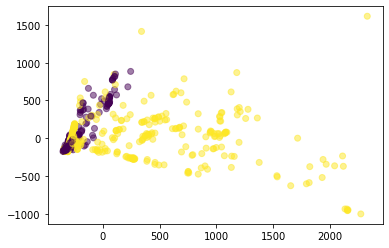

In [207]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5) #การกระจายของ baby and protein

In [208]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
protein_pca = pca.transform(bb[bb['FoodGroup']==5].iloc[:,1:].to_numpy())

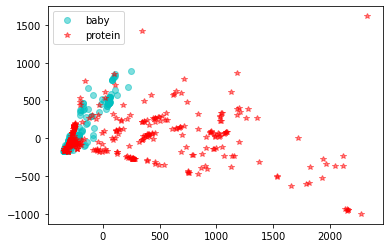

In [209]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(protein_pca[:,0],protein_pca[:,1],'*r',alpha=0.5,label='protein') ##ใส่ชื่อเพื่อให้ง่ายต่อการอ่าน
plt.legend()

##2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [210]:
pca.explained_variance_ratio_

array([0.65900445, 0.17334154])

##การใส่ชื่อกราฟ และ แกน

Text(0, 0.5, 'PC2 (17.33%)')

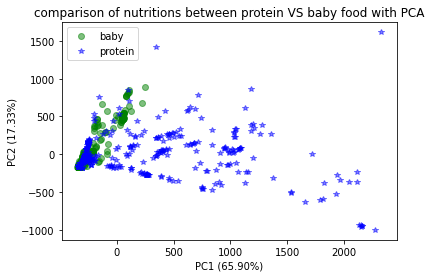

In [211]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'og',alpha=0.5,label='baby')
plt.plot(protein_pca[:,0],protein_pca[:,1],'*b',alpha=0.5,label='protein')
plt.legend()
plt.title('comparison of nutritions between protein VS baby food with PCA') #ชื่อกราฟ
plt.xlabel('PC1 (65.90%)') #แกนX
plt.ylabel('PC2 (17.33%)') #แกน Y